---
# **Theory**
---

# Linear Regression

---

- relation between two values (directly or inversely proportional)

- two types of linear regression: Univariate VS Multivariate Regression (1 feature VS multiple features)


---
# Logistic Regression
---

- classification problems (binary or multi class)
- its not regression (its classification)


---
# Polynomial Regression
---

- number of features ki depth ko increase kerdiya hai
- more depth in a feature


---

- assign weights to each feature
- weight == importance
- weight is initially random
- update weights through gd
- think of ML as one singlular layer (not multiple layers like in an NN)
- SGD and GD are two optimizers
- calculation of loss function (squared error loss)
- then optimize this loss function using GD (derivative)
- concept of epochs (number of iterations)
- learning rate alpha: if high or low then issues like overfitting and underfitting (0.5 learning rate is optimal)
- how to change learning rate? do it manually, or use grid search or random forest


### Train/Test splits

- holdout
- k fold cross validation
- stratify

### Evaluation parameter

- for regreesion: root mean squared (R-squared)
- classification: accuracy

---


In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Datasets/Admission_Predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [92]:
df.drop(axis=1, columns=["Serial No."], inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [93]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [94]:
y = df["Chance of Admit "].values
df.drop(axis=1, columns=["Chance of Admit "], inplace=True)

In [95]:
x_train, x_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42
)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [96]:
# evaluation:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

np.float64(0.06086588041578311)

In [97]:
df_2 = pd.read_csv("Datasets/headbrain.csv")
df_2

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [98]:
X = df_2["Head Size(cm^3)"].values
y = df_2["Brain Weight(grams)"].values

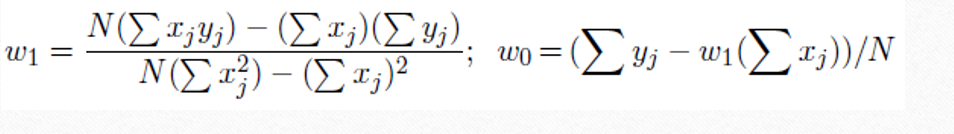


In [99]:
N = len(X)
X_sum = np.sum(X)
X_sq_sum = np.sum(X**2)
y_sum = np.sum(y)
numerator = N * np.sum(X * y) - X_sum * y_sum
denominator = N * X_sq_sum - X_sum**2
m = numerator / denominator
m

np.float64(0.2634293394893993)

In [100]:
b = (y_sum - m * X_sum) / N
b

np.float64(325.57342104944274)

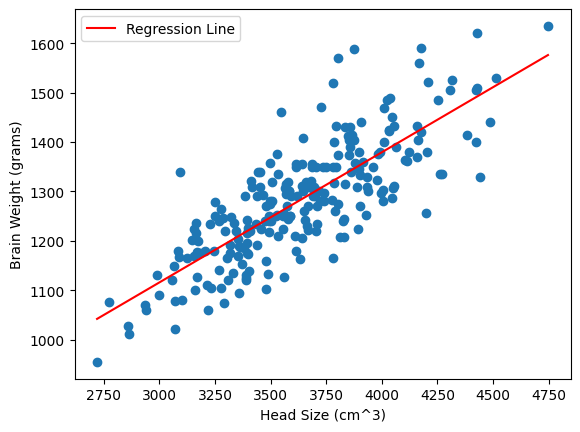

In [101]:
line = m * X + b
max_x = np.max(X)
min_x = np.min(X)
x1 = np.linspace(min_x, max_x)
y1 = m * x1 + b
plt.plot(x1, y1, color="red", label="Regression Line")
plt.scatter(X, y)
plt.xlabel("Head Size (cm^3)")
plt.ylabel("Brain Weight (grams)")
plt.legend()
plt.show()

In [102]:
rmse = 0
for i in range(N):
    y_pred = b + m * X[i]
    rmse += (y[i] - y_pred) ** 2
rmse = np.sqrt(rmse / N)
rmse

np.float64(72.12062137837088)

In [103]:
ss_tot = 0
ss_res = 0
y_mean = np.mean(y)
for i in range(N):
    y_pred = b + m * X[i]
    ss_tot += (y[i] - y_mean) ** 2
    ss_res += (y[i] - y_pred) ** 2
    r2 = 1 - (ss_res / ss_tot)
r2

np.float64(0.6393117199570004)

In [104]:
companies = pd.read_csv("Datasets/1000_Companies.csv")
companies

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


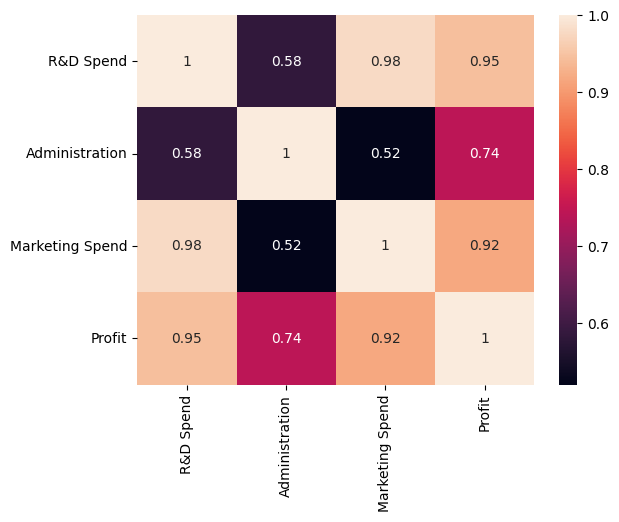

In [105]:
companies_visu = companies.copy()
companies_visu.drop(columns=["State"], inplace=True)
sns.heatmap(companies_visu.corr(), annot=True)
plt.show()

In [106]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
companies["State"] = le.fit_transform(companies["State"])
companies

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,2,192261.83000
1,162597.70,151377.590,443898.5300,0,191792.06000
2,153441.51,101145.550,407934.5400,1,191050.39000
3,144372.41,118671.850,383199.6200,2,182901.99000
4,142107.34,91391.770,366168.4200,1,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,0,95279.96251
996,134970.00,130390.080,329204.0228,0,164336.60550
997,100275.47,241926.310,227142.8200,0,413956.48000
998,128456.23,321652.140,281692.3200,0,333962.19000


In [107]:
y = companies["Profit"].values
companies.drop(columns=["Profit"], inplace=True)
x_train, x_test, y_train, y_test = train_test_split(
    companies, y, random_state=42, test_size=0.2
)

regression = LinearRegression()
regression.fit(x_train, y_train)
y_pred = regression.predict(x_test)
print(f"predicted values: {y_pred[:5]}")
print(f"actual values: {y_test[:5]}")

predicted values: [124684.79388057 111479.32001582  91470.04775236 127197.84421306
 161685.71502459]
actual values: [124269.4859  111257.774    91370.72519 126846.883   161008.2863 ]


In [108]:
from sklearn.metrics import r2_score, mean_squared_error

print(f"R2 score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

R2 score: 0.98282072606409
Mean Squared Error: 30259162.760670938


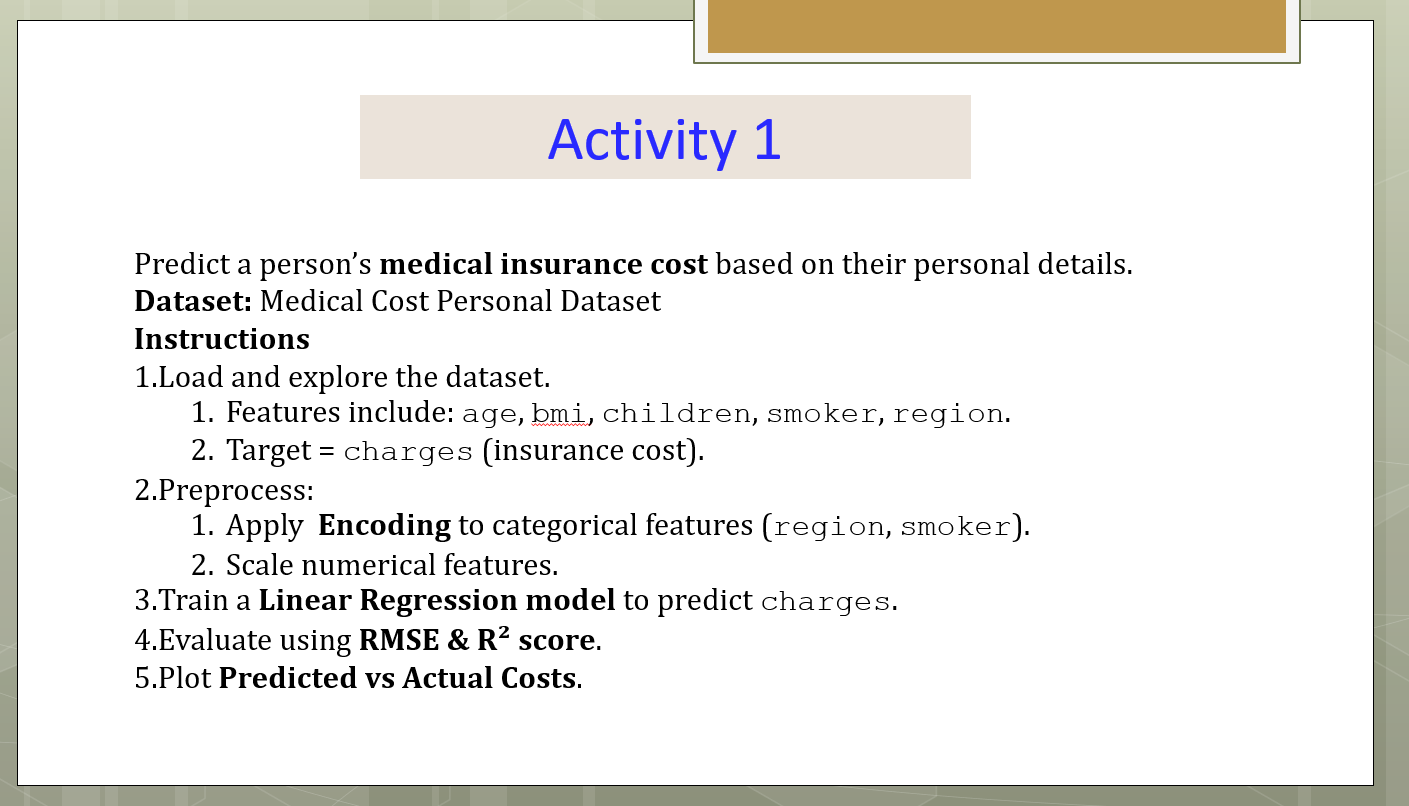


In [109]:
medical_df = pd.read_csv("Datasets/Medical Cost Personal Datasets.csv")
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [110]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()

medical_df["sex"] = le.fit_transform(medical_df["sex"])
medical_df["smoker"] = le.fit_transform(medical_df["smoker"])
medical_df["region"] = le.fit_transform(medical_df["region"])
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [111]:
scaler = StandardScaler()
medical_df[["age", "bmi", "children"]] = scaler.fit_transform(
    medical_df[["age", "bmi", "children"]]
)
medical_df

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,-0.908614,1,3,16884.92400
1,-1.509965,1,0.509621,-0.078767,0,2,1725.55230
2,-0.797954,1,0.383307,1.580926,0,2,4449.46200
3,-0.441948,1,-1.305531,-0.908614,0,1,21984.47061
4,-0.513149,1,-0.292556,-0.908614,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,1.580926,0,1,10600.54830
1334,-1.509965,0,0.206139,-0.908614,0,0,2205.98080
1335,-1.509965,0,1.014878,-0.908614,0,2,1629.83350
1336,-1.296362,0,-0.797813,-0.908614,0,3,2007.94500


In [112]:
from sklearn.linear_model import LinearRegression

y = medical_df["charges"].values
medical_df.drop(columns=["charges"], inplace=True)

lr = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(
    medical_df, y, test_size=0.2, random_state=42
)
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [113]:
prediction = lr.predict(x_test)

In [114]:
from sklearn.metrics import r2_score, mean_squared_error

print(f"R2 Score: {r2_score(y_test, prediction):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, prediction):.2f}")

R2 Score: 0.78
Mean Squared Error: 33635210.43


- R squared is basically the percentage of the difference in the target that the model explains well. this model explains 78% of the changes in the target.


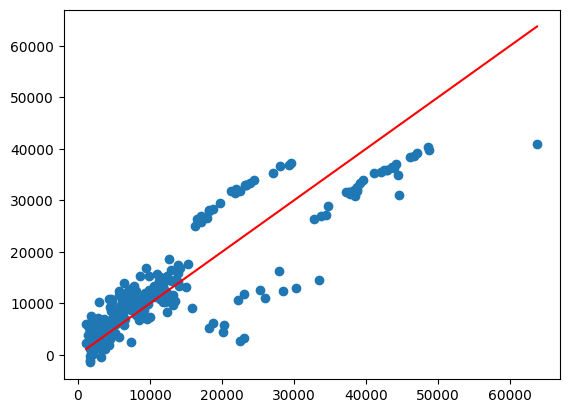

In [115]:
plt.scatter(y_test, prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")

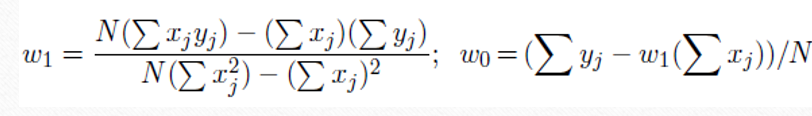


In [116]:
head_brain = pd.read_csv("Datasets/headbrain.csv")
X = head_brain["Head Size(cm^3)"].values
y = head_brain["Brain Weight(grams)"].values

In [117]:
N = len(y)
x = np.sum(X)
y_sum = np.sum(y)
x2 = np.sum(X**2)
xy = np.sum(X * y)

w = (N * xy - x * y_sum) / (N * x2 - x**2)
b = (y_sum - w * x) / N
regression_line = w * X + b

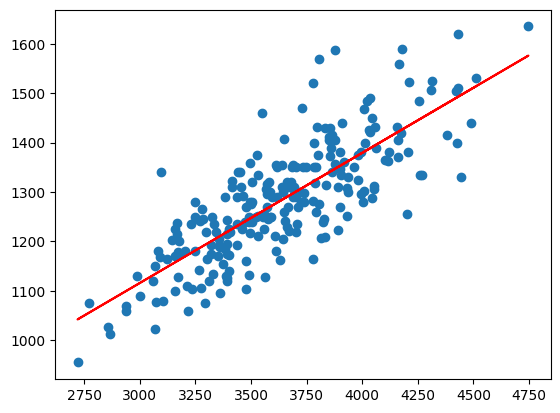

In [121]:
plt.scatter(X, y)
plt.plot(X, regression_line, color="red", label="Regression Line")
plt.show()

In [120]:
customer_churn = pd.read_csv("Datasets/Customer_Churn_Dataset.csv")
customer_churn
customer_churn["Gender"] = le.fit_transform(customer_churn["Gender"])
customer_churn

,CustomerID,Gender,Age,MonthlyCharges,Tenure,Churn
0,101,1,34,45.5,12,No
1,102,0,29,67.3,24,No
2,103,0,40,89.2,36,Yes
3,104,1,50,56.0,48,No
4,105,0,28,73.5,60,Yes
